In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/kaggle_datasets'

In [ ]:
%cd /content/gdrive/MyDrive/kaggle_datasets/chest_xray

/content/gdrive/MyDrive/kaggle_datasets/chest_xray


In [ ]:
!ls

Best-weights-my_model-001-0.4813-0.5000.hdf5  first_try.h5	   test
Best-weights-my_model-002-0.4411-0.5000.hdf5  __MACOSX		   train
Best-weights-my_model-003-0.4064-0.5000.hdf5  model_train_new.csv  val
Best-weights-my_model-004-0.3757-0.5625.hdf5  ResNet
chest_xray				      sample.h5


In [ ]:
#!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

In [ ]:
#!unzip chest-xray-pneumonia.zip

Feature Extraction

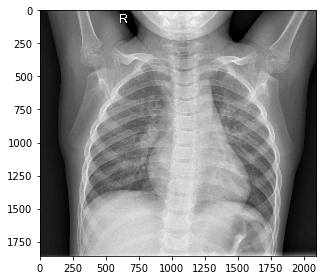

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

image = imread('/content/gdrive/MyDrive/kaggle_datasets/chest_xray/train/NORMAL/IM-0115-0001.jpeg', as_gray=True)
imshow(image)


In [ ]:
#checking image shape 
image.shape, image

((1858, 2090), array([[ 22,  24,  24, ...,  96,  94,  93],
        [ 23,  24,  24, ...,  97,  94,  92],
        [ 24,  24,  23, ...,  99,  96,  94],
        ...,
        [ 49,  50,  48, ..., 119, 119, 119],
        [ 50,  52,  53, ..., 123, 124, 123],
        [ 52,  53,  54, ..., 129, 128, 127]], dtype=uint8))

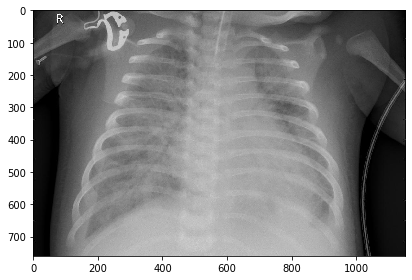

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow


image = imread('/content/gdrive/MyDrive/kaggle_datasets/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg', as_gray=True)
imshow(image)

In [ ]:
#checking image shape 
image.shape, image

((760, 1152), array([[19, 19, 18, ...,  1,  0,  0],
        [19, 19, 18, ...,  1,  0,  0],
        [19, 19, 18, ...,  1,  0,  0],
        ...,
        [10, 10, 10, ..., 15, 15, 15],
        [10, 10, 10, ..., 15, 15, 15],
        [10, 10, 10, ..., 15, 15, 15]], dtype=uint8))

In [ ]:
# importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
DIRECTORY = r'/content/gdrive/MyDrive/kaggle_datasets/chest_xray'
FOLDERS = ['test','train', 'val']

CLASS = ['NORMAL','PNEUMONIA']


Data Augmentaion

In [ ]:
# Import ImageDataGenerator for image preprocessing/augmentation
# This basically creates multiple copies of train images by jittering(adding noise). 
# This includes rotating, zooming in, flipping, shifting, etc.
from keras.preprocessing.image import ImageDataGenerator

batch_size = 128

# This is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest') # 'nearest' is kind of algorithm to fill pixel values while transformation

train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/kaggle_datasets/chest_xray/train',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 224x224
        batch_size=batch_size,
        class_mode='categorical')  #


val_generator = val_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/kaggle_datasets/chest_xray/val',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 224x224
        batch_size=batch_size,
        class_mode='categorical') 


test_generator = test_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/kaggle_datasets/chest_xray/test',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 224x224
        batch_size=batch_size,
        class_mode='categorical') 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# importing the necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

In [ ]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=5,
        validation_data=val_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')  

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
15/15 [==============================] - 708s 45s/step - loss: 1.1926 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
15/15 [==============================] - 456s 30s/step - loss: 0.6932 - accuracy: 0.5000
Epoch 3/5
15/15 [==============================] - 280s 18s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/5
15/15 [==============================] - 172s 12s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5/5
15/15 [==============================] - 118s 8s/step - loss: 0.6931 - accuracy: 0.5000


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

In [ ]:
model.evaluate(val_generator)

1/1 [==============================] - 0s 193ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931471824645996, 0.5]

VGG

In [ ]:
from keras.layers import Input, Dense

In [ ]:
# Custom_vgg_model_1
#Training the classifier alone
image_input = Input(shape=(224, 224, 3))

In [ ]:
from keras.applications.vgg16 import VGG16

model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet')

553467904/553467096 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
last_layer = model.get_layer('fc2').output
out = Dense(2, activation='sigmoid', name='output')(last_layer)

In [ ]:
from keras.models import Model

custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

In [ ]:
custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
hist = custom_vgg_model.fit_generator(train_generator,  epochs=5, verbose=1, validation_data=val_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
41/41 [==============================] - 209s 5s/step - loss: 1.1475 - accuracy: 0.6819 - val_loss: 0.5092 - val_accuracy: 0.8125
Epoch 2/5
41/41 [==============================] - 61s 1s/step - loss: 0.6527 - accuracy: 0.7347 - val_loss: 1.6171 - val_accuracy: 0.5000
Epoch 3/5
41/41 [==============================] - 61s 1s/step - loss: 0.4987 - accuracy: 0.7773 - val_loss: 0.7590 - val_accuracy: 0.5625
Epoch 4/5
41/41 [==============================] - 61s 1s/step - loss: 0.3611 - accuracy: 0.8415 - val_loss: 1.8440 - val_accuracy: 0.5000
Epoch 5/5
41/41 [==============================] - 60s 1s/step - loss: 0.3887 - accuracy: 0.8316 - val_loss: 0.3936 - val_accuracy: 0.7500


In [ ]:
image_input = Input(shape=(224, 224, 3))

# Training the feature extraction also
model = VGG16(input_tensor=image_input, include_top=True, weights='imagenet')

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
last_layer = model.get_layer('block5_pool').output
x = Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(2, activation='sigmoid', name='output')(x)
custom_vgg_model2 = Model(image_input, out)

In [ ]:
custom_vgg_model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# freeze all the layers except the dense layers
for layer in custom_vgg_model2.layers[:-3]:
    layer.trainable = False

In [ ]:
custom_vgg_model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

In [ ]:
from keras import callbacks
filename='model_train_new.csv'

csv_log = callbacks.CSVLogger(filename, separator=',', append=False)

In [ ]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

In [ ]:
filepath="/content/gdrive/MyDrive/kaggle_datasets/chest_xray/Best-weights-my_model-{epoch:03d}-{loss:.4f}-{val_accuracy:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')


In [ ]:
callbacks_list = [csv_log, early_stopping, checkpoint]

In [ ]:
hist = custom_vgg_model2.fit(train_generator,  epochs=5, verbose=1, validation_data=val_generator,callbacks=callbacks_list)

Epoch 1/5
41/41 [==============================] - 60s 1s/step - loss: 0.4813 - accuracy: 0.7452 - val_loss: 0.6954 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.69537, saving model to /content/gdrive/MyDrive/kaggle_datasets/chest_xray/Best-weights-my_model-001-0.4813-0.5000.hdf5
Epoch 2/5
41/41 [==============================] - 61s 1s/step - loss: 0.4411 - accuracy: 0.7594 - val_loss: 0.6631 - val_accuracy: 0.5000

Epoch 00002: val_loss improved from 0.69537 to 0.66309, saving model to /content/gdrive/MyDrive/kaggle_datasets/chest_xray/Best-weights-my_model-002-0.4411-0.5000.hdf5
Epoch 3/5
41/41 [==============================] - 60s 1s/step - loss: 0.4064 - accuracy: 0.7991 - val_loss: 0.6569 - val_accuracy: 0.5000

Epoch 00003: val_loss improved from 0.66309 to 0.65695, saving model to /content/gdrive/MyDrive/kaggle_datasets/chest_xray/Best-weights-my_model-003-0.4064-0.5000.hdf5
Epoch 4/5
41/41 [==============================] - 60s 1s/step - loss: 0.3757 - 

In [ ]:
(loss, accuracy) = custom_vgg_model2.evaluate(test_generator,   verbose=1)


5/5 [==============================] - 23s 5s/step - loss: 0.5010 - accuracy: 0.6795


RESNET

In [ ]:
from keras.layers import Input, Dense
image_input = Input(shape=(224, 224, 3))

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(input_tensor=image_input, include_top=True, weights='imagenet')

102973440/102967424 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
last_layer = model.get_layer('avg_pool').output
out = Dense(2, activation='sigmoid', name='output')(last_layer)

In [ ]:
from keras.models import Model

custom_ResNet_model = Model(image_input, out)
custom_ResNet_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
for layer in custom_ResNet_model.layers[:-1]:
    layer.trainable = False

In [ ]:
custom_ResNet_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
from keras import callbacks
filename='model_train_new.csv'


In [ ]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

In [ ]:
filepath="/content/gdrive/MyDrive/kaggle_datasets/chest_xray/ResNet/Best-weights-my_model-{epoch:03d}-{loss:.4f}-{val_accuracy:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')


In [ ]:
callbacks_list = [csv_log, early_stopping, checkpoint]

In [ ]:
hist = custom_ResNet_model.fit(train_generator,  epochs=15, verbose=1, validation_data=val_generator,callbacks=callbacks_list)

Epoch 1/15
41/41 [==============================] - 63s 1s/step - loss: 0.5809 - accuracy: 0.7462 - val_loss: 0.7273 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.72727, saving model to /content/gdrive/MyDrive/kaggle_datasets/chest_xray/ResNet/Best-weights-my_model-001-0.5673-0.5000.hdf5
Epoch 2/15
41/41 [==============================] - 59s 1s/step - loss: 0.5497 - accuracy: 0.7356 - val_loss: 0.7899 - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from 0.72727


In [ ]:
(loss, accuracy) = custom_ResNet_model.evaluate(test_generator,   verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

5/5 [==============================] - 120s 30s/step - loss: 0.6424 - accuracy: 0.6250
[INFO] loss=0.6424, accuracy: 62.5000%


In [ ]:
tf.keras.applications.ResNet101(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000, **kwargs
)

NameError: ignored